In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv") 

In [3]:
data.shape

(40000, 3)

In [4]:
print(data.groupby('Label').size())

Label
art-and-literature      368
bangladesh            12239
durporobash             176
economy                4771
education               774
entertainment          2448
international          1835
life-style             1121
northamerica            189
opinion               10611
sports                 3354
technology             2113
dtype: int64


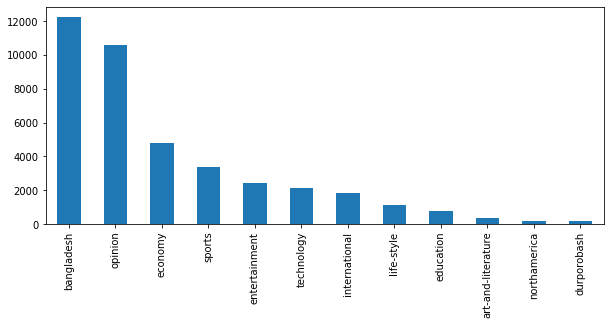

In [5]:
plt.figure(figsize=(10,4)) # whole dataset visualisation
data.Label.value_counts().plot(kind='bar');

In [6]:
p = ["!", "@",'–', "#", "|", "%", "(", ")", "।", "—", ".", "-", "", ",", "’", "•", "‘", ":", "*", "?",
          "০", "১", "২", "৩", "৪", "৫", "৬", "৭", "৮", "৯"]
for i in range(len(p)):
    data['Text'] = data['Text'].str.replace(p[i],'')

In [7]:
data = data.drop_duplicates() #removes duplicate instances
data.dropna(inplace=True)
data.isnull().sum() #removes missing info instances
data.shape

(38737, 3)

In [8]:
tags = data['Label'].unique()
tag_size = data['Label'].value_counts()
#print(data['Label'].unique())
tags

array(['opinion', 'economy', 'bangladesh', 'sports', 'entertainment',
       'life-style', 'international', 'art-and-literature',
       'northamerica', 'technology', 'education', 'durporobash'],
      dtype=object)

In [9]:
# removing less instances categories
data = data[data.Label != 'art-and-literature']
data = data[data.Label != 'durporobash']
data = data[data.Label != 'northamerica']
data.shape

(38027, 3)

In [10]:
print (data['Label'].value_counts()) #minimum instances number = 740

bangladesh       12219
opinion          10169
economy           4642
sports            3167
entertainment     2354
technology        1994
international     1672
life-style        1070
education          740
Name: Label, dtype: int64


In [11]:
# sampling each category with minimum number of instances
d_bn = data[data.Label == 'bangladesh']
d_op = data[data.Label == 'opinion']
d_ec = data[data.Label == 'economy']
d_sp = data[data.Label == 'sports']
d_en = data[data.Label == 'entertainment']
d_tc = data[data.Label == 'technology']
d_in = data[data.Label == 'international']
d_ls = data[data.Label == 'life-style']
d_ed = data[data.Label == 'education']

random_bn = d_bn.sample(n=740, replace=False, random_state=99)
random_op = d_op.sample(n=740, replace=False, random_state=99)
random_ec = d_ec.sample(n=740, replace=False, random_state=99)
random_sp = d_sp.sample(n=740, replace=False, random_state=99)
random_en = d_en.sample(n=740, replace=False, random_state=99)
random_tc = d_tc.sample(n=740, replace=False, random_state=99)
random_in = d_in.sample(n=740, replace=False, random_state=99)
random_ls = d_ls.sample(n=740, replace=False, random_state=99)

In [12]:
newData = pd.concat([random_bn,random_op,random_ec,random_sp,random_en,random_tc,random_in,random_ls,d_ed])
newData.shape

(6660, 3)

In [13]:
sample = data.loc[~data.index.isin(newData.index), :]

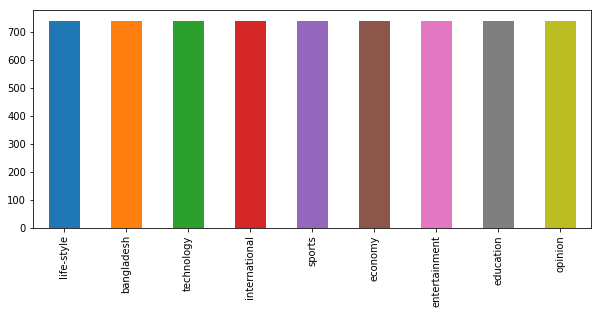

In [94]:
plt.figure(figsize=(10,4))
newData.Label.value_counts().plot(kind='bar');

In [95]:
newData['Text'].apply(lambda x: len(x.split(' '))).sum()

2533496

In [96]:
preProcessedData=pd.DataFrame(newData)
preProcessedData.columns = ['Label','Text','Title']
preProcessedData.to_csv("preProcessedData.csv", index=False, header=True)

In [ ]:
sampleData=pd.DataFrame(newData)
preProcessedData.columns = ['Label','Text','Title']
preProcessedData.to_csv("preProcessedData.csv", index=False, header=True)